**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../input/world-happiness/2019.csv')
df.head()
original=df.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


In [3]:
df.shape

(156, 9)

**Finding highly correlated value using heat map**

In [4]:
corrmat = data.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, square=True)

NameError: name 'data' is not defined

# Plotting pairwise Realtionships

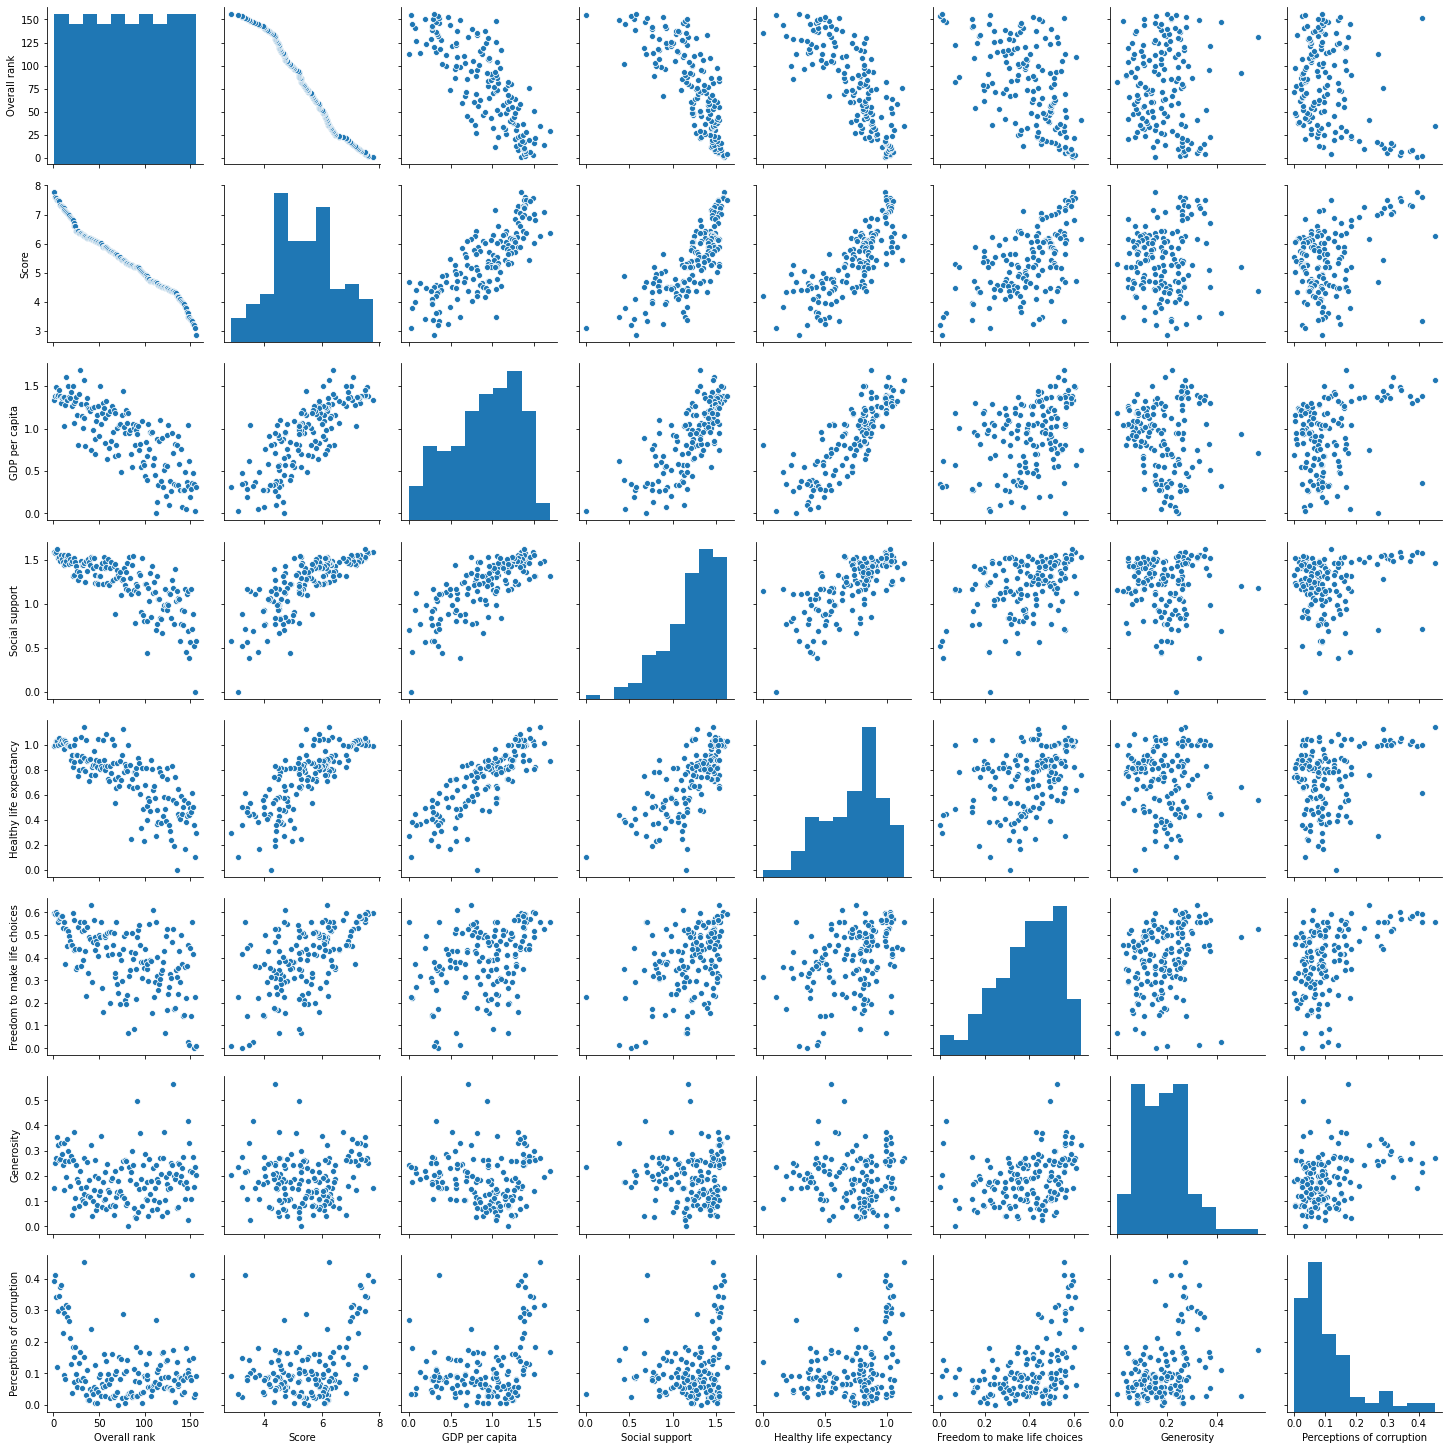

In [5]:
sns.pairplot(df)

# Finding top 10 countries

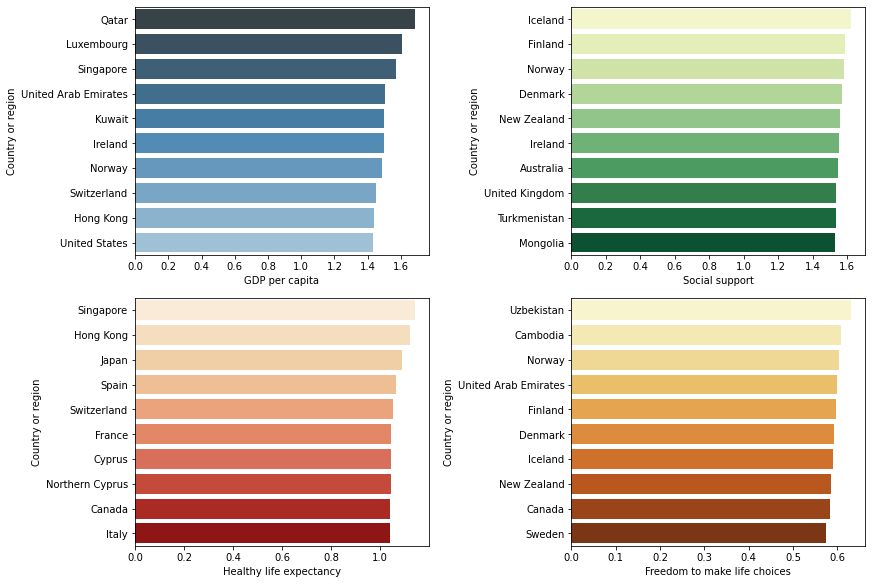

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

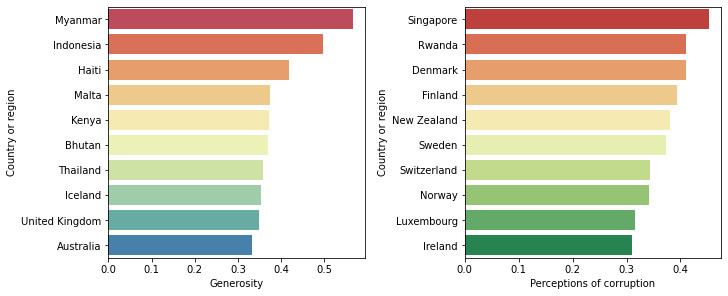

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

In [8]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [9]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [11]:
cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat  

**If city is high color blue and low or mid color is violet**

In [12]:
color = (df.Category == 'High' ).map({True: 'background-color: blue',False:'background-color: violet'})
df.style.apply(lambda s: color)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


# United States

In [13]:
df.loc[df['Country or region']=='United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128,High


# India

In [14]:
df.loc[df['Country or region']=='India']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
139,140,India,4.015,0.755,0.765,0.588,0.498,0.2,0.085,Low


# United Kingdom

In [15]:
df.loc[df['Country or region']=='United Kingdom']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.45,0.348,0.278,High


# Canada

In [16]:
df.loc[df['Country or region']=='Canada']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High


# Comparision of three countries

In [17]:
d= df[(df['Country or region'].isin(['India','Canada','United Kingdom', 'United States']))]
d

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,High
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,High
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085,Low


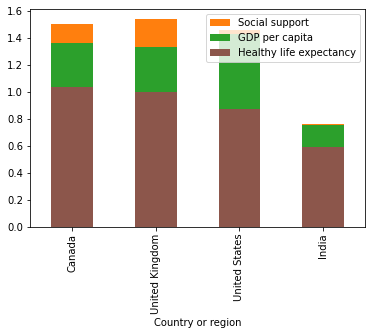

In [18]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C1')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C2")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C5")

plt.show()

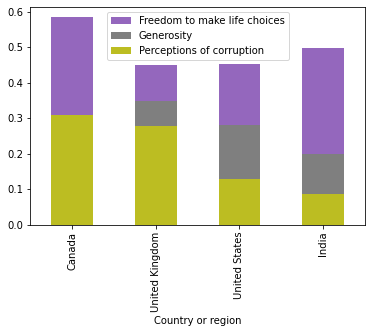

In [19]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C4')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C7",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C8",)

plt.show()

# Geographical view

In [20]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# Addining Previous year

In [21]:
df15=pd.read_csv('../input/world-happiness/2015.csv')
df16=pd.read_csv('../input/world-happiness/2016.csv')
df17=pd.read_csv('../input/world-happiness/2017.csv')
df18=pd.read_csv('../input/world-happiness/2018.csv')

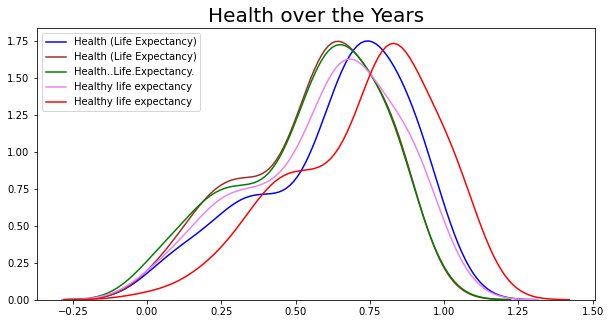

In [22]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df16['Health (Life Expectancy)'],color='brown')
sns.kdeplot(df17['Health..Life.Expectancy.'],color='green')
sns.kdeplot(df18['Healthy life expectancy'],color='violet')
sns.kdeplot(df['Healthy life expectancy'],color='red')
plt.title('Health over the Years',size=20)
plt.show()

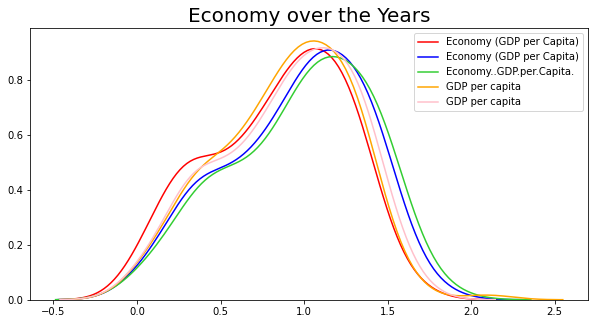

In [23]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Economy (GDP per Capita)'],color='red')
sns.kdeplot(df16['Economy (GDP per Capita)'],color='blue')
sns.kdeplot(df17['Economy..GDP.per.Capita.'],color='limegreen')
sns.kdeplot(df18['GDP per capita'],color='orange')
sns.kdeplot(df['GDP per capita'],color='pink')
plt.title('Economy over the Years',size=20)
plt.show()

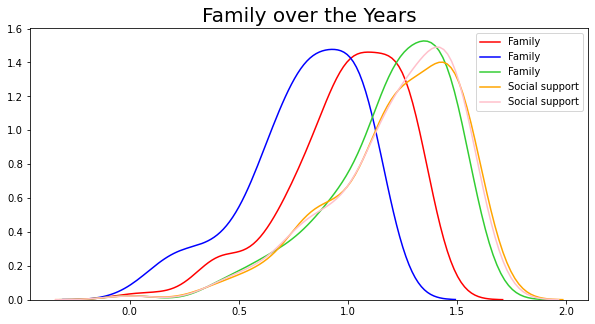

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Family'],color='red')
sns.kdeplot(df16['Family'],color='blue')
sns.kdeplot(df17['Family'],color='limegreen')
sns.kdeplot(df18['Social support'],color='orange')
sns.kdeplot(df['Social support'],color='pink')
plt.title('Family over the Years',size=20)
plt.show()

In [25]:
df18['Year']='2018'
df['Year']='2019'
df15['Year']='2015'
df16['Year']='2016'
df17['Year']='2017'

# GDP of USA,INDIA,UK,CANADA & FINLAND

In [26]:
df.rename(columns={'Country or region':'Country'},inplace=True)
data1=df.filter(['Country','GDP per capita','Year'],axis=1)

df15.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data2=df15.filter(['Country','GDP per capita',"Year"],axis=1)

df16.rename(columns={'Economy (GDP per Capita)':'GDP per capita'},inplace=True)
data3=df16.filter(['Country','GDP per capita',"Year"],axis=1)

df17.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita'},inplace=True)
data4=df17.filter(['Country','GDP per capita','Year'],axis=1)

df18.rename(columns={'Country or region':'Country'},inplace=True)
data5=df18.filter(['Country','GDP per capita',"Year"],axis=1)

data2=data2.append([data3,data4,data5,data1])

Text(0.5, 1.0, 'GDP per capita 2015-2019')

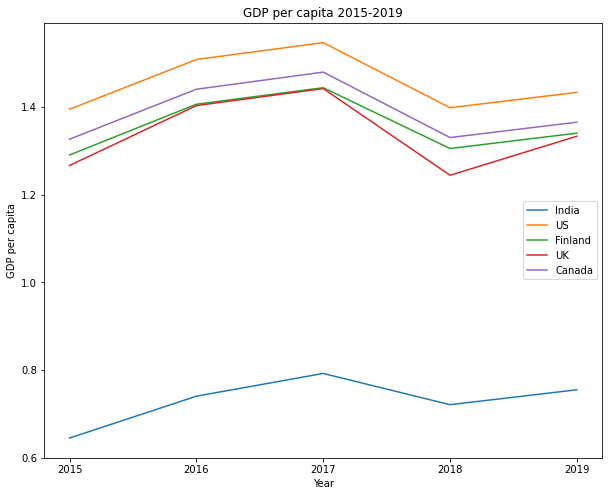

In [27]:
plt.figure(figsize=(10,8))
df = data2[data2['Country']=='India']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='India')

df = data2[data2['Country']=='United States']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='US')

df = data2[data2['Country']=='Finland']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Finland')

df = data2[data2['Country']=='United Kingdom']
sns.lineplot(x="Year", y="GDP per capita",data=df,label="UK")

df = data2[data2['Country']=='Canada']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Canada')

plt.title("GDP per capita 2015-2019")